## Agrupamiento según posiciones 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar los datos
df = pd.read_csv('players_22.csv')
df.head(5)


C:\Users\christianr\AppData\Local\Temp\ipykernel_42496\2337367099.py:8: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
#Selección de características para el clustering
sel_carac = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_sel = df[sel_carac] 

In [5]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pace       17107 non-null  float64
 1   shooting   17107 non-null  float64
 2   passing    17107 non-null  float64
 3   dribbling  17107 non-null  float64
 4   defending  17107 non-null  float64
 5   physic     17107 non-null  float64
dtypes: float64(6)
memory usage: 902.0 KB


In [6]:
df_sel.describe()

,pace,shooting,passing,dribbling,defending,physic
count,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000
mean,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289
std,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886
min,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000
25%,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000
50%,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,76.000000,63.000000,64.000000,69.000000,64.000000,72.000000
max,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000


In [8]:
#Preprocesamiento de los datos
df_sel = df_sel.dropna()

#Escalamos los datos
scaler = StandardScaler()
df_sel_scaled = scaler.fit_transform(df_sel)

c:\Users\christianr\anaconda3\envs\dias\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\christianr\anaconda3\envs\dias\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\christianr\anaconda3\envs\dias\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\christianr\anaconda3\envs\dias\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

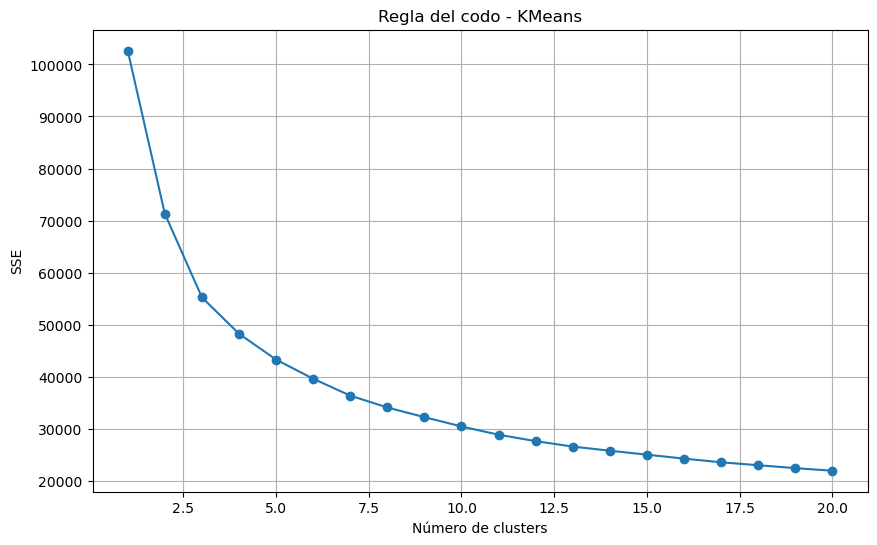

In [11]:
#Clustering - 4 grupos (Posición en el campo)

sse = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_sel_scaled)
    sse.append(kmeans.inertia_)
 
plt.figure(figsize=(10,6))
plt.plot(range(1,21), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Regla del codo - KMeans')
plt.grid()
plt.show()  

In [14]:
#Vamos a escoger el valor de k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_sel_scaled)
df_sel['cluster'] = kmeans.labels_

c:\Users\christianr\anaconda3\envs\dias\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


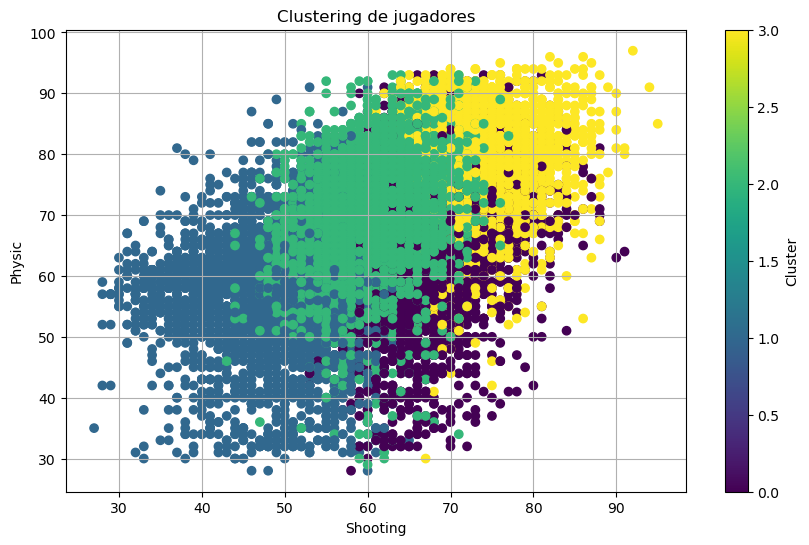

In [20]:
#Visualización de los clusters

plt.figure(figsize=(10,6))
#Escoger qué características se quieren visualizar: shooting y physic
scatter = plt.scatter(df_sel['dribbling'], df_sel['pace'], c=df_sel['cluster'], cmap='viridis')
plt.colorbar(scatter, label = 'Cluster')
plt.xlabel('Shooting')
plt.ylabel('Physic')
plt.title('Clustering de jugadores')
plt.grid()
plt.show()

In [16]:
#Interpretación de los clusters
medias_clusters = df_sel.groupby('cluster').mean()
print("Promedio de las características por clúster:")
print(medias_clusters)

Promedio de las características por clúster:
              pace   shooting    passing  dribbling  defending     physic
cluster                                                                  
0        67.954886  54.864301  63.883381  66.647646  64.472718  70.335770
1        60.067526  34.131711  47.122882  50.659747  61.464328  67.379862
2        69.744101  54.758783  52.179601  61.020975  34.124803  54.369166
3        76.726674  67.514596  64.591586  71.959073  38.689754  64.320550


Grupo 0: Jugadores fuertes, con buena defensa, buen regate, buen pase, medio disparo. (centros)
Grupo 1: Jugadores fuertes, buena defensa, medio regate, medio pase, mal disparo. (defensas)
Grupo 2: Jugadores no tan fuertes, mala defensa, buen regate, buen pase, medio disparo (lateral)
Grupo 3: Jugadores fuertes, mal defensa, buen regate, buen pase, buen disparo. (delanteros)

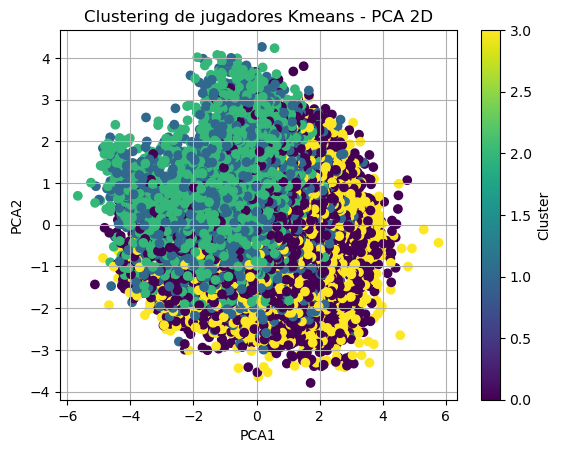

In [22]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
df_sel_pca = PCA.fit_transform(df_sel_scaled)
df_sel_pca = pd.DataFrame(df_sel_pca, columns=['pca1', 'pca2'])
df_sel_pca['cluster'] = df_sel['cluster']

scatter = plt.scatter(df_sel_pca['pca1'], df_sel_pca['pca2'], c=df_sel_pca['cluster'], cmap='viridis')
plt.colorbar(scatter, label = 'Cluster')
plt.xlabel('PCA1')  
plt.ylabel('PCA2')
plt.title('Clustering de jugadores Kmeans - PCA 2D')
plt.grid()
plt.show()